#                                                        APPENDIX

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

In [233]:
#Creating The Grid

x = np.zeros(101) #Creating x array based on given dimensions (0 ≤ x ≤ 100 - step size = 1/100)
xstep = 1/100 # Defining x Step (could be altered to create a finer mesh)
tstep = 1/100 # Defining Time Step (could be altered to create a finer mesh)
nt = int(((0.16)/tstep))+1 #Defining number of steps needed based on the time step
t = np.zeros(nt)  #Creating time array (0≤t≤16 - step size = 1/100)
q = np.zeros(3) #Creating an array for the 3 variable of Q (𝜌,𝑚,𝐸)

T, Q, X = np.meshgrid(t,q,x) #Meshing the three arrays to create a grid based on an order of: Rows, Dimensions, Columns

#T and Q and X are equal, So only Q would be used as a grid
np.shape(Q) #Confirming the shape of the size

(3, 17, 101)

In [234]:
#Defining The Boundary Conditions of the Grid

Q[0,0,0:52] = 0.445 #setting the boundary layers for 𝜌 (0 ≤ 𝜌 ≤ 0.5)
Q[0,0,52:] = 0.5 #setting the boundary layers for 𝜌 (0.5 < 𝜌 ≤ 1)

Q[1,0,0:52] = 0.311 #setting the boundary layers for 𝜌 (0 ≤ 𝑚 ≤ 0.5)
Q[1,0,52:] = 0.0 #setting the boundary layers for 𝜌 (0.5 < 𝑚 ≤ 1)

Q[2,0,0:52] = 8.928 #setting the boundary layers for 𝜌 (0 ≤ 𝐸 ≤ 0.5)
Q[2,0,52:] = 1.4275 #setting the boundary layers for 𝜌 (0.5 < 𝐸 ≤ 1)

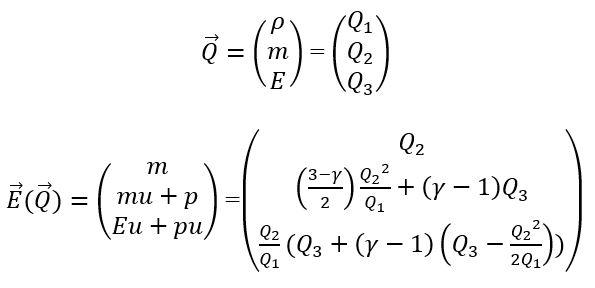

In [235]:
E = np.zeros((3,17,101)) #Defining a grid for E(Q)

γ = 1.4 #Defining the Adiabatic Index

#Updating E(Q) based on Q
E[0] = Q[1] 
E[1] = (((3-γ)/2)*np.nan_to_num(np.divide(np.power(Q[1],2),Q[0]))) + ((γ-1)*Q[2]) 
E[2] = np.multiply(np.nan_to_num(np.divide(Q[1],Q[0])) , Q[2]+(γ-1)*(Q[2]-np.nan_to_num(np.divide(np.power(Q[1],2),2*Q[0]))))

warnings.filterwarnings("ignore")

#Note:

#The initial grids had values of zero; while dividing, errors was generated when dividing by those values. 

#When this occured, the command "np.nan_to_num" was used to assign 0 for these cases.

#The warnings that was generated from these errors were removed as well through "filterwarnings".

#                                                        Godunov Scheme

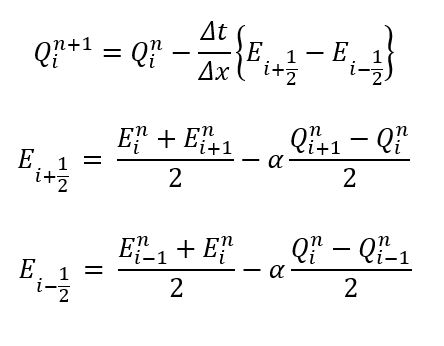
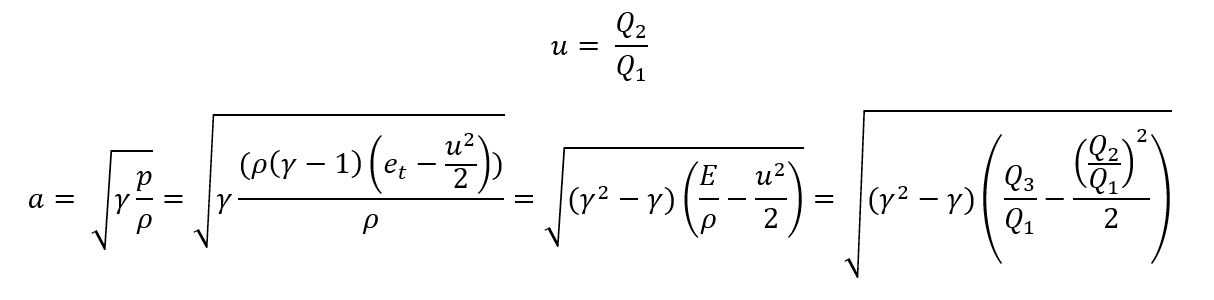

α = |u|+|a| 

In [236]:
#Godunov Algorithm

for n in range (0,16):
    for i in range (0,100):
        
        # Lax-Friedrichs Fluxes:
        
        αi = np.nan_to_num(abs(Q[1,n, i]/Q[0, n, i]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i]/Q[0,n, i])-(((Q[1,n, i]/Q[0, n, i])**2)/2))))))
        αip = np.nan_to_num(abs(Q[1,n, i+1]/Q[0, n, i+1]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i+1]/Q[0,n, i+1])-(((Q[1,n, i+1]/Q[0, n, i+1])**2)/2))))))

        α = max(αi,αip)
        
        FplusHalf𝜌 = ((E[0,n,i]+E[0,n,i+1])/2)-((α/2)*((Q[0,n,i+1]-Q[0,n,i])))
        FplusHalf𝑚 = ((E[1,n,i]+E[1,n,i+1])/2)-((α/2)*((Q[1,n,i+1]-Q[1,n,i])))
        FplusHalfEN = ((E[2,n,i]+E[2,n,i+1])/2)-((α/2)*((Q[2,n,i+1]-Q[2,n,i])))
        
        αim = np.nan_to_num(abs(Q[1,n, i-1]/Q[0, n, i-1]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i-1]/Q[0,n, i-1])-(((Q[1,n, i-1]/Q[0, n, i-1])**2)/2))))))
        α = max(αi,αim)
        
        FminusHalf𝜌 = ((E[0,n,i-1]+E[0,n,i])/2)-((α/2)*((Q[0,n,i]-Q[0,n,i-1])))    
        FminusHalf𝑚 = ((E[1,n,i-1]+E[1,n,i])/2)-((α/2)*((Q[1,n,i]-Q[1,n,i-1])))     
        FminusHalfEN = ((E[2,n,i-1]+E[2,n,i])/2)-((α/2)*((Q[2,n,i]-Q[2,n,i-1])))
        
        # Solving based on Godunov
        
        Q[0, n+1, i] = Q[0, n, i] - (tstep/xstep)*(FplusHalf𝜌-FminusHalf𝜌)
        Q[1, n+1, i] = Q[1, n, i] - (tstep/xstep)*(FplusHalf𝑚-FminusHalf𝑚)
        Q[2, n+1, i] = Q[2, n, i] - (tstep/xstep)*(FplusHalfEN-FminusHalfEN)
        
        # Updating E(Q)
        
        E[0, n+1, i] = Q[1, n+1, i]
        E = np.nan_to_num(E)
        E[1, n+1, i] = ((3-γ/2)*((Q[1,n+1, i]**2)/Q[0, n+1, i]))+ ((γ-1)*Q[2, n+1, i])
        E = np.nan_to_num(E)
        E[2, n+1, i] = (Q[1,n+1, i]/Q[0, n+1, i])*(Q[2, n+1, i]+((γ-1)*(Q[2, n+1, i]-((Q[1,n+1, i]**2)/(Q[0, n+1, i]*2)))))
        E = np.nan_to_num(E)

In [237]:
#Saving the Data

𝜌godunov = Q[0,16,]
𝑚godunov = Q[1,16,]
𝐸godunov = Q[2,16,]

In [238]:
#Re-setting the Grids

T, Q, X = np.meshgrid(t,q,x) #Meshing the three arrays to create a grid based on an order of: Rows, Dimensions, Columns


Q[0,0,0:52] = 0.445 #setting the boundary layers for 𝜌 (0 ≤ 𝜌 ≤ 0.5)
Q[0,0,52:] = 0.5 #setting the boundary layers for 𝜌 (0.5 < 𝜌 ≤ 1)

Q[1,0,0:52] = 0.311 #setting the boundary layers for 𝜌 (0 ≤ 𝑚 ≤ 0.5)
Q[1,0,52:] = 0.0 #setting the boundary layers for 𝜌 (0.5 < 𝑚 ≤ 1)

Q[2,0,0:52] = 8.928 #setting the boundary layers for 𝜌 (0 ≤ 𝐸 ≤ 0.5)
Q[2,0,52:] = 1.4275 #setting the boundary layers for 𝜌 (0.5 < 𝐸 ≤ 1)

E = np.zeros((3,17,101)) #Defining a grid for E(Q)
E[0] = Q[1] 
E[1] = ((3-γ/2)*np.nan_to_num(np.divide(np.power(Q[1],2),Q[0]))) + ((γ-1)*Q[2]) 
E[2] = np.multiply((np.nan_to_num(np.divide(Q[1],Q[0]))),((γ-1)*(Q[2]-np.nan_to_num(np.divide(np.power(Q[1],2),2*Q[0])))))

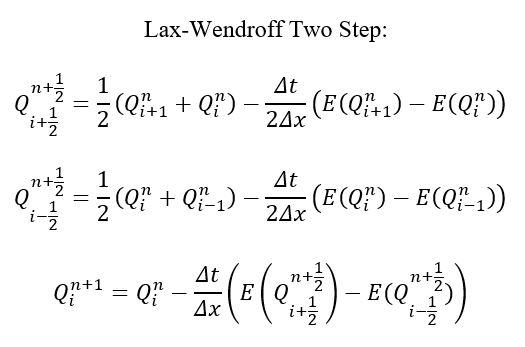

In [240]:
# Lax-Wendroff Algorithm


for n in range (0,16):
    for i in range (0,100):        
        
        #First Step
        
        Q𝜌plus = (1/2)*(Q[0, n, i+1] + Q[0, n, i]) - (tstep/(2*xstep))*(E[0, n, i+1] - E[0, n, i])
        Q𝑚plus = (1/2)*(Q[1, n, i+1] + Q[1, n, i]) - (tstep/(2*xstep))*(E[1, n, i+1] - E[1, n, i])
        Q𝐸plus = (1/2)*(Q[2, n, i+1] + Q[2, n, i]) - (tstep/(2*xstep))*(E[2, n, i+1] - E[2, n, i])
        
        Q𝜌minus = (1/2)*(Q[0, n, i] + Q[0, n, i-1]) - (tstep/(2*xstep))*(E[0, n, i+1] - E[0, n, i])
        Q𝑚𝑚inus = (1/2)*(Q[1, n, i] + Q[1, n, i-1]) - (tstep/(2*xstep))*(E[1, n, i+1] - E[1, n, i])
        Q𝐸minus = (1/2)*(Q[2, n, i] + Q[2, n, i-1]) - (tstep/(2*xstep))*(E[2, n, i] - E[2, n, i-1])
        
        E𝜌plus = Q𝑚plus
        E𝑚plus = ((3-γ)/2)*((Q𝑚plus**2)/Q𝜌plus)+(γ-1)*Q𝐸plus
        E𝐸plus = (Q𝑚plus/Q𝜌plus)*(Q𝐸plus + (γ-1)*(Q𝐸plus-((Q𝑚plus**2)/(2*Q𝜌plus))))
        
        E𝜌minus = Q𝑚minus
        E𝑚minus = ((3-γ)/2)*((Q𝑚minus**2)/Q𝜌minus)+(γ-1)*Q𝐸minus
        E𝐸minus = (Q𝑚minus/Q𝜌minus)*(Q𝐸minus + (γ-1)*(Q𝐸minus-((Q𝑚minus**2)/(2*Q𝜌minus))))
        
        #Second Step
        
        Q[0, n+1, i] = Q[0, n, i] - (tstep/xstep)*(E𝜌plus-E𝜌minus)
        Q[1, n+1, i] = Q[1, n, i] - (tstep/xstep)*(E𝑚plus-E𝑚minus)
        Q[2, n+1, i] = Q[2, n, i] - (tstep/xstep)*(E𝐸plus-E𝐸minus)
        
        # Updating E(Q)
        
        E[0, n+1, i] = Q[1, n+1, i]
        E = np.nan_to_num(E)
        E[1, n+1, i] = ((3-γ/2)*((Q[1,n+1, i]**2)/Q[0, n+1, i]))+ ((γ-1)*Q[2, n+1, i])
        E = np.nan_to_num(E)
        E[2, n+1, i] = (Q[1,n+1, i]/Q[0, n+1, i])*(Q[2, n+1, i]+((γ-1)*(Q[2, n+1, i]-((Q[1,n+1, i]**2)/(Q[0, n+1, i]*2)))))
        E = np.nan_to_num(E)

In [241]:
#Saving the Data

𝜌LW = Q[0,16,]
𝑚LW = Q[1,16,]
𝐸LW = Q[2,16,]

In [242]:
#Re-setting the Grids

T, Q, X = np.meshgrid(t,q,x) #Meshing the three arrays to create a grid based on an order of: Rows, Dimensions, Columns


Q[0,0,0:52] = 0.445 #setting the boundary layers for 𝜌 (0 ≤ 𝜌 ≤ 0.5)
Q[0,0,52:] = 0.5 #setting the boundary layers for 𝜌 (0.5 < 𝜌 ≤ 1)

Q[1,0,0:52] = 0.311 #setting the boundary layers for 𝜌 (0 ≤ 𝑚 ≤ 0.5)
Q[1,0,52:] = 0.0 #setting the boundary layers for 𝜌 (0.5 < 𝑚 ≤ 1)

Q[2,0,0:52] = 8.928 #setting the boundary layers for 𝜌 (0 ≤ 𝐸 ≤ 0.5)
Q[2,0,52:] = 1.4275 #setting the boundary layers for 𝜌 (0.5 < 𝐸 ≤ 1)

E = np.zeros((3,17,101)) #Defining a grid for E(Q)
E[0] = Q[1] 
E[1] = ((3-γ/2)*np.nan_to_num(np.divide(np.power(Q[1],2),Q[0]))) + ((γ-1)*Q[2]) 
E[2] = np.multiply((np.nan_to_num(np.divide(Q[1],Q[0]))),((γ-1)*(Q[2]-np.nan_to_num(np.divide(np.power(Q[1],2),2*Q[0])))))

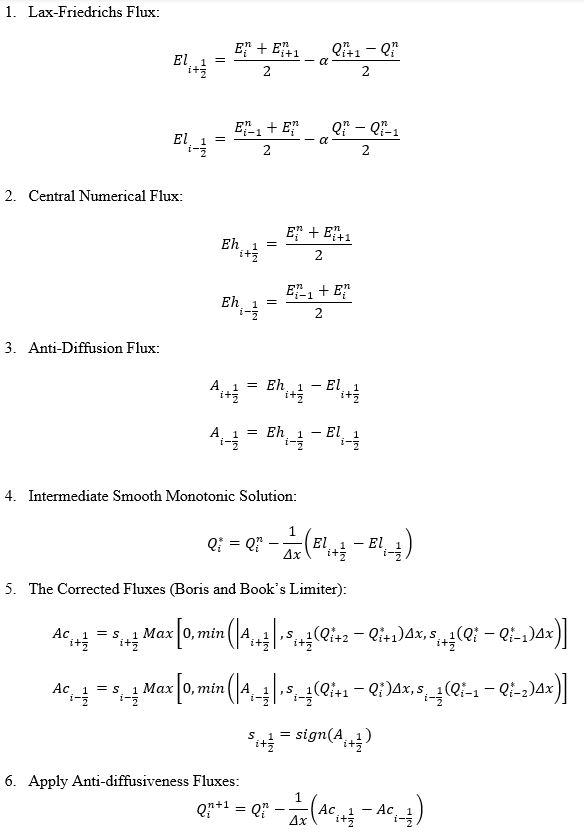

In [189]:
#FCT Algorithm

for n in range (0,16):
    for i in range (0,98): 
        
        #Lax-Friedrichs Fluxes:
        
        αi = np.nan_to_num(abs(Q[1,n, i]/Q[0, n, i]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i]/Q[0,n, i])-(((Q[1,n, i]/Q[0, n, i])**2)/2))))))
        αip = np.nan_to_num(abs(Q[1,n, i+1]/Q[0, n, i+1]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i+1]/Q[0,n, i+1])-(((Q[1,n, i+1]/Q[0, n, i+1])**2)/2))))))

        α = max(αi,αip)
        
        FLplusHalf𝜌 = ((E[0,n,i]+E[0,n,i+1])/2)-((α/2)*((Q[0,n,i+1]-Q[0,n,i])))
        FLplusHalf𝑚 = ((E[1,n,i]+E[1,n,i+1])/2)-((α/2)*((Q[1,n,i+1]-Q[1,n,i])))
        FLplusHalfEN = ((E[2,n,i]+E[2,n,i+1])/2)-((α/2)*((Q[2,n,i+1]-Q[2,n,i])))
        
        αim = np.nan_to_num(abs(Q[1,n, i-1]/Q[0, n, i-1]) + abs(math.sqrt(abs((γ**2-γ)*((Q[2,n, i-1]/Q[0,n, i-1])-(((Q[1,n, i-1]/Q[0, n, i-1])**2)/2))))))
        α = max(αi,αim)
        
        FLminusHalf𝜌 = ((E[0,n,i-1]+E[0,n,i])/2)-((α/2)*((Q[0,n,i]-Q[0,n,i-1])))       
        FLminusHalf𝑚 = ((E[1,n,i-1]+E[1,n,i])/2)-((α/2)*((Q[1,n,i]-Q[1,n,i-1])))
        FLminusHalfEN = ((E[2,n,i-1]+E[2,n,i])/2)-((α/2)*((Q[2,n,i]-Q[2,n,i-1])))
        
        #Central Numerical Fluxes:
        
        FHplusHalf𝜌 = ((E[0,n,i]+E[0,n,i+1])/2)
        FHminusHalf𝜌 = ((E[0,n,i-1]+E[0,n,i])/2)
        
        FHplusHalf𝑚 = ((E[1,n,i]+E[1,n,i+1])/2)
        FHminusHalf𝑚 = ((E[1,n,i-1]+E[1,n,i])/2)
        
        FHplusHalfEN = ((E[2,n,i]+E[2,n,i+1])/2)
        FHminusHalfEN = ((E[2,n,i-1]+E[2,n,i])/2)
        
        #Anti-Diffusion Fluxes:
        
        AplusHalf𝜌 = FHplusHalf𝜌 - FLplusHalf𝜌
        AminusHalf𝜌 = FHminusHalf𝜌 - FLminusHalf𝜌
        
        AplusHalf𝑚 = FHplusHalf𝑚 - FLplusHalf𝑚
        AminusHalf𝑚 = FHminusHalf𝑚 - FLminusHalf𝑚
        
        AplusHalf𝐸 = FHplusHalfEN - FLplusHalfEN
        AminusHalf𝐸 = FHminusHalfEN - FLminusHalfEN
        
        # Intermediate Smooth Monotonic Solutions:
        
        Qstar𝜌 = Q[0, n, i] - (1/xstep)*(FLplusHalf𝜌-FLminusHalf𝜌)
        Qstar𝑚 = Q[1, n, i] - (1/xstep)*(FLplusHalf𝑚-FLminusHalf𝑚)
        Qstar𝐸 = Q[2, n, i] - (1/xstep)*(FLplusHalfEN-FLminusHalfEN)
        
        # Correcting Fluxes - Boris-Book Flux limiter:
        
        signplushalf𝜌 = np.sign(AplusHalf𝜌)
        signminushalf𝜌 = np.sign(AminusHalf𝜌)
        
        signplushalf𝑚 = np.sign(AplusHalf𝑚)
        signminushalf𝑚 = np.sign(AminusHalf𝑚)
        
        signplushalf𝐸 = np.sign(AplusHalf𝐸)
        signminushalf𝐸 = np.sign(AminusHalf𝐸)
        
        α = max(αi,αip)
        
        FLplus3Halves𝜌 = ((E[0,n,i+1]+E[0,n,i+2])/2)-((α/2)*((Q[0,n,i+2]-Q[0,n,i+1])))
        FLplus3Halves𝑚 = ((E[1,n,i+1]+E[1,n,i+2])/2)-((α/2)*((Q[1,n,i+2]-Q[1,n,i+1])))
        FLplus3HalvesEN = ((E[2,n,i+1]+E[2,n,i+2])/2)-((α/2)*((Q[2,n,i+2]-Q[2,n,i+1])))
        
        Qstarplusone𝜌 = Q[0, n, i+1] - (1/xstep)*(FLplus3Halves𝜌-FLplusHalf𝜌)
        Qstarplusone𝑚 = Q[1, n, i+1] - (1/xstep)*(FLplus3Halves𝑚-FLplusHalf𝑚)
        Qstarplusone𝐸 = Q[2, n, i+1] - (1/xstep)*(FLplus3HalvesEN-FLplusHalfEN)
        
        FLplus5Halves𝜌 = ((E[0,n,i+2]+E[0,n,i+3])/2)-((α/2)*((Q[0,n,i+3]-Q[0,n,i+2])))
        FLplus5Halves𝑚 = ((E[1,n,i+2]+E[1,n,i+3])/2)-((α/2)*((Q[1,n,i+3]-Q[1,n,i+2])))
        FLplus5HalvesEN = ((E[2,n,i+2]+E[2,n,i+3])/2)-((α/2)*((Q[2,n,i+3]-Q[2,n,i+2])))
        
        Qstarplustwo𝜌 = Q[0, n, i+2] - (1/xstep)*(FLplus5Halves𝜌-FLplus3Halves𝜌)
        Qstarplustwo𝑚 = Q[1, n, i+2] - (1/xstep)*(FLplus5Halves𝑚-FLplus3Halves𝑚)
        Qstarplustwo𝐸 = Q[2, n, i+2] - (1/xstep)*(FLplus5HalvesEN-FLplus3HalvesEN)
        
        α = max(αi,αim)
        
        FLminus3Halves𝜌 = ((E[0,n,i-2]+E[0,n,i-1])/2)-((α/2)*((Q[0,n,i-1]-Q[0,n,i-2])))
        FLminus3Halves𝑚 = ((E[1,n,i-2]+E[1,n,i-1])/2)-((α/2)*((Q[1,n,i-1]-Q[1,n,i-2])))
        FLminus3HalvesEN = ((E[2,n,i-2]+E[2,n,i-1])/2)-((α/2)*((Q[2,n,i-1]-Q[2,n,i-2])))
        
        Qstarminusone𝜌 = Q[0, n, i-1] - (1/xstep)*(FLminusHalf𝜌-FLminus3Halves𝜌)
        Qstarminusone𝑚 = Q[1, n, i-1] - (1/xstep)*(FLminusHalf𝑚-FLminus3Halves𝑚)
        Qstarminusone𝐸 = Q[2, n, i-1] - (1/xstep)*(FLminusHalfEN-FLminus3HalvesEN)
        
        FLminus5Halves𝜌 = ((E[0,n,i-3]+E[0,n,i-2])/2)-((α/2)*((Q[0,n,i-2]-Q[0,n,i-3])/2))
        FLminus5Halves𝑚 = ((E[1,n,i-3]+E[1,n,i-2])/2)-((α/2)*((Q[1,n,i-2]-Q[1,n,i-3])/2))
        FLminus5HalvesEN = ((E[2,n,i-3]+E[2,n,i-2])/2)-((α/2)*((Q[2,n,i-2]-Q[2,n,i-3])/2))
        
        Qstarminustwo𝜌 = Q[0, n, i-2] - (1/xstep)*(FLminus3Halves𝜌-FLminus5Halves𝜌)
        Qstarminustwo𝑚 = Q[1, n, i-2] - (1/xstep)*(FLminus3Halves𝑚-FLminus5Halves𝑚)
        Qstarminustwo𝐸 = Q[2, n, i-2] - (1/xstep)*(FLminus3HalvesEN-FLminus5HalvesEN)
        
        AcplusHalf𝜌 = signplushalf𝜌 * max(0, min(abs(AplusHalf𝜌), signplushalf𝜌*(Qstarplustwo𝜌-Qstarplusone𝜌), signplushalf𝜌*(Qstar𝜌-Qstarminusone𝜌)))
        AcplusHalf𝜌 = signminushalf𝜌 * max(0, min(abs(AminusHalf𝜌), signplushalf𝜌*(Qstarplusone𝜌-Qstar𝜌), signplushalf𝜌*(Qstarminusone𝜌-Qstarminustwo𝜌)))
        
        AcplusHalf𝑚 = signplushalf𝑚 * max(0, min(abs(AplusHalf𝑚), signplushalf𝑚*(Qstarplustwo𝑚-Qstarplusone𝑚), signplushalf𝑚*(Qstar𝑚-Qstarminusone𝑚)))
        AcminusHalf𝑚 = signminushalf𝑚 * max(0, min(abs(AminusHalf𝑚), signplushalf𝑚*(Qstarplusone𝑚-Qstar𝑚), signplushalf𝜌*(Qstarminusone𝑚-Qstarminustwo𝑚)))
        
        AcplusHalf𝐸 = signplushalf𝐸 * max(0, min(abs(AplusHalf𝐸), signplushalf𝑚*(Qstarplustwo𝐸-Qstarplusone𝐸), signplushalf𝑚*(Qstar𝐸-Qstarminusone𝐸)))
        AcminusHalf𝐸 = signminushalf𝐸 * max(0, min(abs(AminusHalf𝐸), signplushalf𝑚*(Qstarplusone𝐸-Qstar𝐸), signplushalf𝜌*(Qstarminusone𝐸-Qstarminustwo𝐸)))
        
        # Anti-diffusiveness Fluxes:
        
        Q[0, n+1, i] = Q[0, n, i] - (1/xstep)*(AcplusHalf𝜌-AcplusHalf𝜌)
        Q[1, n+1, i] = Q[1, n, i] - (1/xstep)*(AcplusHalf𝑚-AcminusHalf𝑚)
        Q[2, n+1, i] = Q[2, n, i] - (1/xstep)*(AcplusHalf𝐸-AcminusHalf𝐸)
        
        # Updating E(Q)
        
        E[0, n+1, i] = Q[1, n+1, i]
        E = np.nan_to_num(E)
        E[1, n+1, i] = ((3-γ/2)*((Q[1,n+1, i]**2)/Q[0, n+1, i]))+ ((γ-1)*Q[2, n+1, i])
        E = np.nan_to_num(E)
        E[2, n+1, i] = (Q[1,n+1, i]/Q[0, n+1, i])*(Q[2, n+1, i]+((γ-1)*(Q[2, n+1, i]-((Q[1,n+1, i]**2)/(Q[0, n+1, i]*2)))))
        E = np.nan_to_num(E)

In [190]:
#Saving the Data

𝜌FCT = Q[0,16,]
𝑚FCT = Q[1,16,]
𝐸FCT = Q[2,16,]

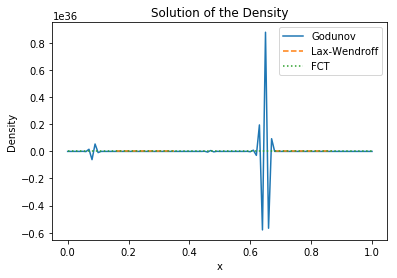

In [249]:
#plotting the Denisty

xaxis = np.linspace(0,1,101)
plt.plot(xaxis, 𝜌godunov, label = "Godunov", linestyle="-")
plt.plot(xaxis, 𝜌LW, label = "Lax-Wendroff", linestyle="--")
plt.plot(xaxis, 𝜌FCT, label = "FCT", linestyle=":")
plt.legend()
plt.title('Solution of the Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()


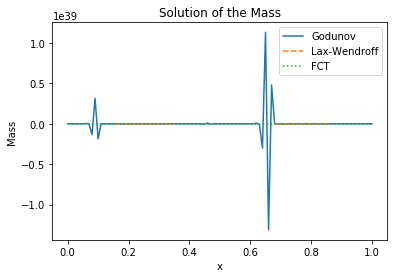

In [250]:
#plotting the mass

plt.plot(xaxis, 𝑚godunov, label = "Godunov", linestyle="-")
plt.plot(xaxis, 𝑚LW, label = "Lax-Wendroff", linestyle="--")
plt.plot(xaxis, 𝑚FCT, label = "FCT", linestyle=":")
plt.legend()
plt.title('Solution of the Mass')
plt.xlabel('x')
plt.ylabel('Mass')
plt.show()

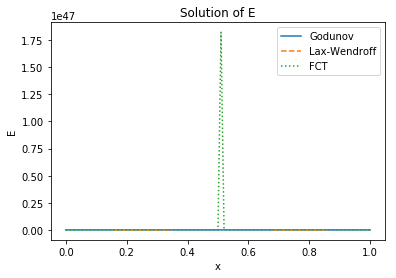

In [251]:
#plotting E

plt.plot(xaxis, 𝐸godunov, label = "Godunov", linestyle="-")
plt.plot(xaxis, 𝐸LW, label = "Lax-Wendroff", linestyle="--")
plt.plot(xaxis, 𝐸FCT, label = "FCT", linestyle=":")
plt.legend()
plt.title('Solution of E')
plt.xlabel('x')
plt.ylabel('E')
plt.show()